In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dus14 = pd.read_csv('DUS2014.csv')
dus18 = pd.read_csv('DUS2018.csv')

In [4]:
d14s = dus14[['lytis', 'amzius', 'bdu_spalio', 'issilavinimas', 'profesija']]
d18s = dus18[['lytis', 'amzius', 'bdu_spalio', 'issilavinimas', 'profesija']]

In [9]:
# suraskite ir išspausdinkite vidutinius vyrų bei moterų atlyginimus (spalio)
# 2014 ir 2018 metams.

d14m_mean = dus14[dus14['lytis'] == 'M']['bdu_spalio'].mean()/3.4528
d14f_mean = dus14[dus14['lytis'] == 'F']['bdu_spalio'].mean()/3.4528
d18m_mean = dus18[dus18['lytis'] == 'M']['bdu_spalio'].mean()
d18f_mean = dus18[dus18['lytis'] == 'F']['bdu_spalio'].mean()
print(f'2014 vyrų: {d14m_mean:.0f}, moterų {d14f_mean:.0f}')
print(f'2018 vyrų: {d18m_mean:.0f}, moterų {d18f_mean:.0f}')

2014 vyrų: 763, moterų 607
2018 vyrų: 1014, moterų 832


In [108]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
bdu_spalio = d14s['bdu_spalio'].values
bdu_spalio_eurais = bdu_spalio/3.4528
d14s['bdu_spalio_eurais']=bdu_spalio_eurais
d14s.head()

,lytis,amzius,bdu_spalio,issilavinimas,profesija,bdu_spalio_eurais,bdu_eur_is_funkcijos
0,M,20-29,6.00,G4,261,1.737720,1.737720
1,F,20-29,6.00,G2,334,1.737720,1.737720
2,F,40-49,6.00,G4,221,1.737720,1.737720
3,F,30-39,6.00,G4,332,1.737720,1.737720
4,M,40-49,11.33,G2,962,3.281395,3.281395


In [46]:
d14s.query('(lytis == "M") and (issilavinimas == "G4")')

,lytis,amzius,bdu_spalio,issilavinimas,profesija,bdu_spalio_eurais,bdu_eur_is_funkcijos,Lytis
0,M,20-29,6.00,G4,261,1.737720,1.737720,Vyras
6,M,60+,6.00,G4,221,1.737720,1.737720,Vyras
17,M,20-29,10.00,G4,122,2.896200,2.896200,Vyras
26,M,20-29,25.33,G4,342,7.336075,7.336075,Vyras
33,M,20-29,9.67,G4,252,2.800626,2.800626,Vyras
...,...,...,...,...,...,...,...,...
44925,M,40-49,7849.67,G4,134,2273.421571,2273.421571,Vyras
44927,M,30-39,1793.00,G4,231,519.288693,519.288693,Vyras
44931,M,50-59,3246.00,G4,232,940.106580,940.106580,Vyras
44934,M,60+,3819.67,G4,231,1106.252896,1106.252896,Vyras


In [17]:
edu = input("Įveskite išsilavinimo kodą (G1, G2, G3, G4)")
d14s.query('issilavinimas == @edu')

,lytis,amzius,bdu_spalio,issilavinimas,profesija,bdu_spalio_eurais
10,F,40-49,10.00,G3,334,2.896200
11,M,20-29,9.67,G3,315,2.800626
13,F,20-29,9.00,G3,332,2.606580
16,F,30-39,6.00,G3,241,1.737720
18,M,60+,6.00,G3,312,1.737720
...,...,...,...,...,...,...
44930,F,20-29,2184.33,G3,235,632.625695
44936,F,30-39,2418.33,G3,235,700.396779
44937,F,50-59,2834.00,G3,233,820.783133
44939,F,30-39,2209.00,G3,232,639.770621


In [36]:
edus = ['G1', 'G2', 'G3', 'G4']

for lygis in edus:
    print(f'{lygis}: {d14s.query('issilavinimas == @lygis')['bdu_spalio_eurais'].mean():.0f}')

G1: 475
G2: 544
G3: 730
G4: 1012


In [39]:
def ltlToEuro(litas):
    return litas/3.4528

d14s['bdu_eur_is_funkcijos'] = d14s['bdu_spalio'].apply(ltlToEuro)

d14s.head()

C:\Users\User\AppData\Local\Temp\ipykernel_10876\3880540557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d14s['bdu_eur_is_funkcijos'] = d14s['bdu_spalio'].apply(ltlToEuro)


,lytis,amzius,bdu_spalio,issilavinimas,profesija,bdu_spalio_eurais,bdu_eur_is_funkcijos
0,M,20-29,6.00,G4,261,1.737720,1.737720
1,F,20-29,6.00,G2,334,1.737720,1.737720
2,F,40-49,6.00,G4,221,1.737720,1.737720
3,F,30-39,6.00,G4,332,1.737720,1.737720
4,M,40-49,11.33,G2,962,3.281395,3.281395


In [44]:
# parašykite kodą, kuris pridėtų naują stulpelį prie d14s lentelės
#  kur būtų tokie žodžiai:
# Vyras, jei stulpelyje lytis buvo M raidė
# Moteris, jei stulpelyje lytis buvo F raidė

def M_F(lytis):
    if lytis == 'M':
        return 'Vyras'
    else:
        return 'Moteris'
    
d14s['Lytis'] = d14s['lytis'].apply(M_F)

d14s.head()

,lytis,amzius,bdu_spalio,issilavinimas,profesija,bdu_spalio_eurais,bdu_eur_is_funkcijos,Lytis
0,M,20-29,6.00,G4,261,1.737720,1.737720,Vyras
1,F,20-29,6.00,G2,334,1.737720,1.737720,Moteris
2,F,40-49,6.00,G4,221,1.737720,1.737720,Moteris
3,F,30-39,6.00,G4,332,1.737720,1.737720,Moteris
4,M,40-49,11.33,G2,962,3.281395,3.281395,Vyras


In [48]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', encoding='utf-8', parse_dates=['OCCUR_DATE', 'OCCUR_TIME'])
nypd.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,201575314,2019-08-23,2024-04-11 22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,205748546,2019-11-27,2024-04-11 15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571
2,193118596,2019-02-02,2024-04-11 19:40:00,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480
3,204192600,2019-10-24,2024-04-11 00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,40.638064,-74.166108
4,201483468,2019-08-22,2024-04-11 18:03:00,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,40.854547,-73.913339


In [50]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})
nypd.head(3)

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,2019-08-23 22:10:00,201575314,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,2019-11-27 15:54:00,205748546,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571
2,2019-02-02 19:40:00,193118596,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480


In [51]:
nypd_small = nypd[['DATA', 'BORO', 'STATISTICAL_MURDER_FLAG']]
nypd_small.head()

,DATA,BORO,STATISTICAL_MURDER_FLAG
0,2019-08-23 22:10:00,QUEENS,False
1,2019-11-27 15:54:00,BRONX,False
2,2019-02-02 19:40:00,MANHATTAN,False
3,2019-10-24 00:52:00,STATEN ISLAND,True
4,2019-08-22 18:03:00,BRONX,False


In [56]:
# .dt modulis veikia tik tada, jei stulpelis Dataframe yra datetime tipo
nypd_small['MonthNumber'] = nypd_small['DATA'].dt.month
nypd_small['MonthName'] = nypd_small['DATA'].dt.month_name()
nypd_small['Hour'] = nypd_small['DATA'].dt.hour
nypd_small['HR'] = nypd_small['DATA'].dt.round('H').dt.hour

nypd_small.head(3)

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNumber,MonthName,Hour,HR
0,2019-08-23 22:10:00,QUEENS,False,8,August,22,22
1,2019-11-27 15:54:00,BRONX,False,11,November,15,16
2,2019-02-02 19:40:00,MANHATTAN,False,2,February,19,20


In [59]:
# sukurkite du naujus stulpelius
# viename turi būti paros laikas ('Rytas, Vakaras, etc)
# kitame metų laikas (žiema, vasara, etc)
# naudokite stulpelius Hour ir MonthNr

def paros_laikas(valanda):
    if valanda < 6:
        return 'Naktis'
    elif valanda < 12:
        return 'Rytas'
    elif valanda < 18:
        return 'Diena'
    else:
        return 'Vakaras'

def metu_laikas(menuo):
    if menuo <= 2 or menuo == 12:
        return 'Žiema'
    elif menuo < 6:
        return 'Pavasaris'
    elif menuo < 10:
        return 'Vasara'
    else:
        return 'Ruduo'
    
nypd_small['Paros_laikas'] = nypd_small['Hour'].apply(paros_laikas)
nypd_small['Metu_laikas'] = nypd_small['MonthNumber'].apply(metu_laikas)
nypd_small.head(3)



,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNumber,MonthName,Hour,HR,Paros_laikas,Metu_laikas
0,2019-08-23 22:10:00,QUEENS,False,8,August,22,22,Vakaras,Vasara
1,2019-11-27 15:54:00,BRONX,False,11,November,15,16,Diena,Ruduo
2,2019-02-02 19:40:00,MANHATTAN,False,2,February,19,20,Vakaras,Žiema


In [60]:
# grąžina series objektą, kuriame Monthname yra index, o skaičiai yra values
nypd_small['MonthName'].value_counts()

MonthName
July         2482
August       2462
June         2192
May          2037
September    2033
October      1851
December     1601
April        1578
November     1550
January      1411
March        1331
February     1098
Name: count, dtype: int64

In [61]:
nypd_small['MonthName'].value_counts().sort_values(ascending=True)

MonthName
February     1098
March        1331
January      1411
November     1550
April        1578
December     1601
October      1851
September    2033
May          2037
June         2192
August       2462
July         2482
Name: count, dtype: int64

In [62]:
nypd_small['MonthName'].value_counts().sort_index(ascending=True)

MonthName
April        1578
August       2462
December     1601
February     1098
January      1411
July         2482
June         2192
March        1331
May          2037
November     1550
October      1851
September    2033
Name: count, dtype: int64

In [65]:
shootings = nypd_small['MonthName'].value_counts()
months = shootings.index
counts = shootings.values
print(months)
print(counts)
print(list(months))
print(list(counts))

Index(['July', 'August', 'June', 'May', 'September', 'October', 'December',
       'April', 'November', 'January', 'March', 'February'],
      dtype='object', name='MonthName')
[2482 2462 2192 2037 2033 1851 1601 1578 1550 1411 1331 1098]
['July', 'August', 'June', 'May', 'September', 'October', 'December', 'April', 'November', 'January', 'March', 'February']
[2482, 2462, 2192, 2037, 2033, 1851, 1601, 1578, 1550, 1411, 1331, 1098]


In [66]:
nypd_small['MonthNumber'].value_counts().sort_index(ascending=True)

MonthNumber
1     1411
2     1098
3     1331
4     1578
5     2037
6     2192
7     2482
8     2462
9     2033
10    1851
11    1550
12    1601
Name: count, dtype: int64

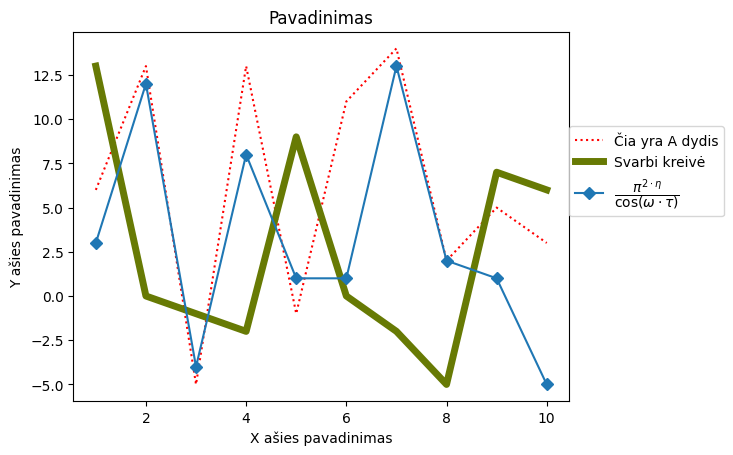

In [95]:
# langas, grafikas = plt.subplots(2,3, figsize=[16,9])
import numpy as np
a = np.arange(1,11)
b = np.random.randint(-5, 15, 10)
c = np.random.randint(-5, 15, 10)
d = np.random.randint(-5, 15, 10)
langas, grafikas = plt.subplots()
grafikas.plot(a,b, label="Čia yra A dydis", linestyle = ':', color = 'red')
grafikas.plot(a,c, label="Svarbi kreivė", linewidth = 5, color = 'xkcd:olive green')
grafikas.plot(a,d, label=r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$', marker = 'D')

# grafikas.legend(loc='best')
grafikas.legend(loc=[1,0.5]) #apatinio legendos kampo koordinatės
# grafikas.legend(loc='upper left')
grafikas.set_xlabel('X ašies pavadinimas')
grafikas.set_ylabel('Y ašies pavadinimas')
grafikas.set_title('Pavadinimas')
plt.show()

# https://matplotlib.org/stable/api/markers_api.html

# 900+ spalvų, kurias galima tekstu nurodyti:
# https://xkcd.com/color/rgb/

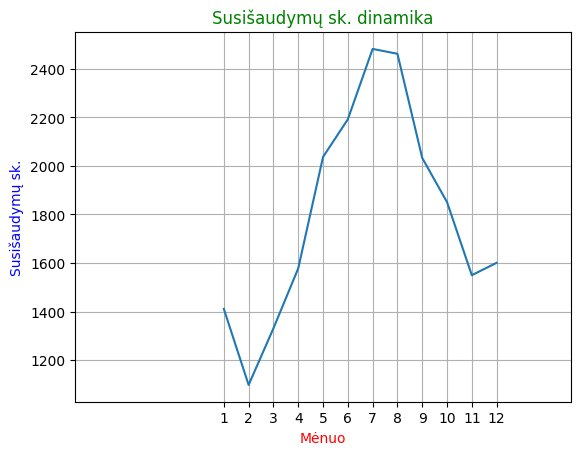

In [136]:
# turite nypd susišaudymų duomenis.
# nubraižykite vizualizaciją, naudodami ką tik pateiktą pavyzdį, 
# kad matytumėme, kurį monėsį yra daugiausiai, mažiausiai užfiksduotų
# susišaudymų
# sudėkite prasmingus ašių pavadinimus

langas, susisaudymai = plt.subplots()
susisaudymai.plot(nypd_small['MonthNumber'].value_counts().sort_index(ascending=True).index, nypd_small['MonthNumber'].value_counts().sort_index(ascending=True).values)
susisaudymai.set_xticks(nypd_small['MonthNumber'].value_counts().index)
susisaudymai.set_xlabel('Mėnuo', color = 'red')
susisaudymai.set_ylabel('Susišaudymų sk.', color = 'blue')
susisaudymai.set_title('Susišaudymų sk. dinamika', color = 'green')
susisaudymai.set_xlim(-5,15) # x ašies ribų keitimas
susisaudymai.grid()
plt.show()

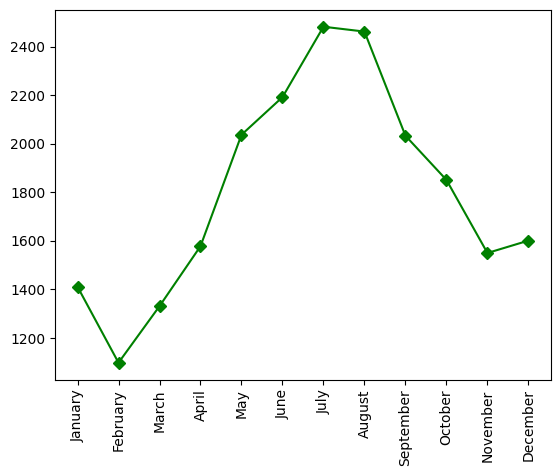

In [143]:
months = nypd_small[['MonthName', 'MonthNumber']].value_counts().reset_index().sort_values(by='MonthNumber')
fig, ax = plt.subplots()

mnames = months['MonthName'].values
mnumbers = months['MonthNumber']
counts = months['count'].values # vietoj count gali būti 0 - reik žiūrėt, kaip pavadintų 1 eil. be kintamojo

ax.plot(mnumbers, counts, marker='D', c='green')
ax.set_xticks(mnumbers)
ax.set_xticklabels(mnames, rotation=90)

plt.show()

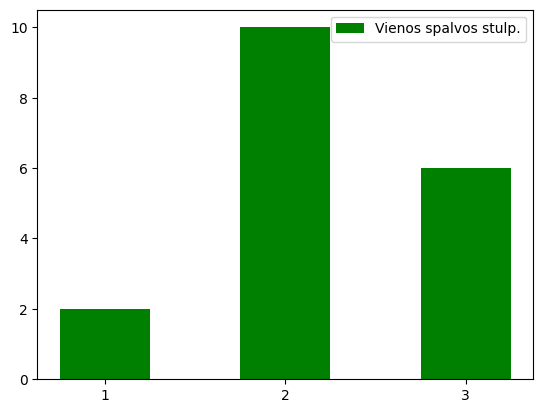

In [148]:
# bar grafikai:
a = np.arange(1,4)
b = np.random.randint(1,11,3)
# color_list = ['green', 'red', 'blue', 'xkcd:deep purple'] # kaip pritaikyt?

fig, ax = plt.subplots()

ax.bar(a, b, color = 'green', width = 0.5, label = 'Vienos spalvos stulp.')
ax.set_xticks(a)
ax.legend(loc='best')

plt.show()

In [ ]:
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:


#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(fwidth*2,fheight*2), gridspec_kw={'width_ratios':[1,1], 'height_ratios':[1,1]})
#ax1:
#plotting code:


#ax1.legend(loc='best')
#ax2:
#plotting code:


#ax2.legend(loc='best')
#ax3:
#plotting code:


#ax3.legend(loc='best')
#ax4:
#plotting code:


#ax4.legend(loc='best')
fig.tight_layout()
plt.show()

In [ ]:
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:


axis.set_xlabel('X ašis', fontsize=fontsize)
axis.set_ylabel('Y ašis', fontsize=fontsize)
axis.set_title('Pavadinimas', fontsize=titlesize)
axis.tick_params(axis='x', labelsize=labelsize)
axis.tick_params(axis='y', labelsize=labelsize)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

In [ ]:
# :imp -importavimui
# :sfig - vienam grafikui
# :fig - 1nm grafikui su daugiau kodo